#### Suppose you have some tweets and know their categories.

You want to train a system with this pre-categorized/pre-classified 
texts. So, you have better call this data your training set.

In [4]:
import pandas as pd
import numpy as np

In [24]:
Train_txt_ = pd.read_csv('Train_20180302_updt.txt', sep="\t", engine='python', names=["Text","Kategori"])
Train_txt_

,Text,Kategori
0,Agresif,Neuroticism
1,Amuk,Neuroticism
2,Ancaman,Neuroticism
3,Antek,Neuroticism
4,Arogan,Neuroticism
5,Aseng,Neuroticism
6,Asing,Neuroticism
7,Babi,Neuroticism
8,Bahaya,Neuroticism
9,Bangke,Neuroticism


In [87]:
#Let's read the test data now
Tes_txt_ = pd.read_csv('Tes_20180302_up.txt', sep='\t', engine='python', header=None, skiprows=1, names=["Text","Kategori"])
Tes_txt_

,Text,Kategori
0,Berawal dari keterbatasan dan kesederhanaan un...,Conscientiousness
1,Aku emg egois! aku pgn km cuma syg sm aku. aku...,Conscientiousness
2,Bila ingin membuat perubahan atas nasib bangsa...,Conscientiousness
3,Cuman dota itu ribet karena mechanics dan timi...,Conscientiousness
4,"Rasul bersabda, ”Yg namanya kaya bukanlah dg m...",Conscientiousness
5,Kalini lebih teratur dan tak rushing,Conscientiousness
6,"Senangnya Anies Lihat The Jakmania Tertib, Rap...",Conscientiousness
7,Saya sih gak heran dg org2 fanatik yg merasa p...,Conscientiousness
8,Allah yg mengatur segalanya Tugas kita hanya t...,Conscientiousness
9,Malam ni baru ada keserasian dengan semua model,Conscientiousness


In [88]:
target = Train_txt_["Kategori"].unique()
target

array(['Neuroticism', 'Extraversion', 'Openness to experience',
       'Agreebleness', 'Conscientiousness'], dtype=object)

In [89]:
# change category into number
data_dict = {}
count = 1
for data in target:
    data_dict[data] = count
    count+=1
Train_kategori_id = Train_txt_['Kategori'].replace(data_dict)
Tes_kategori_id = Tes_txt_['Kategori'].replace(data_dict)

In [90]:
Tabel_train_id = pd.DataFrame(Train_kategori_id)

Tabel_tes_id = pd.DataFrame(Tes_kategori_id)

In [91]:
Tabel_tes_id.columns = ['Kategori_id']
Tabel_train_id.columns = ['Kategori_id']

In [92]:
# stem_train = pd.read_csv('text1.csv', sep=',', engine='python', header=None, skiprows=1, names=["Index","Text"])
# stem_tes = pd.read_csv('text2.csv', sep=',', engine='python', header=None, skiprows=1, names=["Index","Text"])

In [93]:
# Tabel_tes_id Train_txt_ => ["Text","Kategori"]
train = pd.concat([Train_txt_['Text'],Train_txt_['Kategori'],Tabel_train_id], axis = 1)
tes = pd.concat([Tes_txt_['Text'],Tes_txt_['Kategori'],Tabel_tes_id], axis = 1)

In [94]:
print(train)
print(tes)

             Text           Kategori  Kategori_id
0         Agresif        Neuroticism            1
1            Amuk        Neuroticism            1
2         Ancaman        Neuroticism            1
3           Antek        Neuroticism            1
4          Arogan        Neuroticism            1
5           Aseng        Neuroticism            1
6           Asing        Neuroticism            1
7            Babi        Neuroticism            1
8          Bahaya        Neuroticism            1
9          Bangke        Neuroticism            1
10        Bangsat        Neuroticism            1
11         Bantai        Neuroticism            1
12           Bego        Neuroticism            1
13          Benci        Neuroticism            1
14       Berantem        Neuroticism            1
15     Bertengkar        Neuroticism            1
16         Biadab        Neuroticism            1
17        Bimbang        Neuroticism            1
18        Bingung        Neuroticism            1


In [95]:
data_dict

{'Agreebleness': 4,
 'Conscientiousness': 5,
 'Extraversion': 2,
 'Neuroticism': 1,
 'Openness to experience': 3}

In [96]:
#summary of data
print(train.describe())
print(tes.describe())

       Kategori_id
count   607.000000
mean      2.729819
std       1.517603
min       1.000000
25%       1.000000
50%       3.000000
75%       4.000000
max       5.000000
       Kategori_id
count   299.000000
mean      2.993311
std       1.414198
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000


In [97]:
#check the correlation of each column
corr_train = train.corr()
corr_tes = tes.corr()
print(corr_train["Kategori_id"])
print(corr_tes["Kategori_id"])
# Calculate the skew
skew_train = train.skew()
skew_tes = tes.skew()
print(skew_train)
print(skew_tes)

Kategori_id    1.0
Name: Kategori_id, dtype: float64
Kategori_id    1.0
Name: Kategori_id, dtype: float64
Kategori_id    0.193849
dtype: float64
Kategori_id    0.00473
dtype: float64


In [98]:
# train.to_csv("train_psycho.csv")
# tes.to_csv("tes_psycho.csv")

Modeling the Data - KNN Algorithm n create weight of each tweet before

In [99]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train['Text'])
X_train_counts.shape

(607, 572)

In [100]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(607, 572)

In [101]:
X_train_tfidf

<607x572 sparse matrix of type '<class 'numpy.float64'>'
	with 627 stored elements in Compressed Sparse Row format>

In [102]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, train['Kategori_id'])

In [103]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB())])

In [104]:
text_clf = text_clf.fit(train['Text'], train['Kategori_id'])

In [105]:
tes['Kategori_id']

0      5
1      5
2      5
3      5
4      5
5      5
6      5
7      5
8      5
9      5
10     5
11     5
12     5
13     5
14     5
15     5
16     5
17     5
18     5
19     5
20     5
21     5
22     5
23     5
24     5
25     5
26     5
27     5
28     5
29     5
      ..
269    1
270    1
271    1
272    1
273    1
274    1
275    1
276    1
277    1
278    1
279    1
280    1
281    1
282    1
283    1
284    1
285    1
286    1
287    1
288    1
289    1
290    1
291    1
292    1
293    1
294    1
295    1
296    1
297    1
298    1
Name: Kategori_id, Length: 299, dtype: int64

In [106]:
predicted = text_clf.predict(tes['Text'])
np.mean(predicted == tes['Kategori_id'])

0.54515050167224077

In [107]:
predicted

array([5, 1, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 1, 1, 4, 5, 1, 5, 1, 5, 5, 5, 1,
       5, 1, 5, 1, 1, 1, 2, 1, 5, 1, 5, 5, 5, 4, 5, 4, 1, 5, 5, 5, 5, 5, 5,
       1, 1, 5, 5, 5, 5, 5, 5, 5, 3, 1, 1, 4, 4, 1, 4, 4, 1, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 3, 2, 4, 5, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 1, 4, 2, 4, 2, 2, 1, 4, 1, 1, 1, 4, 4, 2, 5, 4, 4, 4, 1, 1,
       1, 4, 4, 4, 4, 2, 1, 1, 1, 1, 4, 2, 1, 1, 4, 3, 1, 3, 1, 2, 1, 1, 1,
       3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 4, 1, 1, 2, 1, 2, 1, 1,
       1, 3, 2, 4, 4, 1, 2, 1, 1, 1, 1, 4, 1, 1, 2, 5, 1, 4, 2, 2, 1, 2, 1,
       4, 2, 5, 2, 2, 4, 1, 2, 2, 4, 2, 4, 2, 4, 2, 1, 5, 4, 1, 5, 1, 1, 1,
       1, 2, 2, 1, 4, 1, 1, 1, 1, 4, 4, 2, 2, 2, 1, 2, 1, 1, 4, 2, 1, 1, 2,
       5, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64

In [108]:
# tes['Kategori_id']

In [109]:
#using SVM classifier
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, random_state=42))])

In [110]:
_ = text_clf_svm.fit(train['Text'], train['Kategori_id'])
predicted_svm = text_clf_svm.predict(tes['Text'])
np.mean(predicted_svm == tes['Kategori_id'])

C:\Users\eBdesk\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.66889632107023411

In [111]:
predicted_svm_train = text_clf_svm.predict(train['Text'])
np.mean(predicted_svm_train == train['Kategori_id'])

0.94892915980230641

In [112]:
predicted_svm

array([5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 2, 1, 4, 5, 1, 5, 1, 5, 5, 5, 1,
       5, 5, 5, 1, 3, 1, 2, 5, 5, 1, 5, 5, 5, 4, 5, 4, 1, 5, 5, 5, 5, 5, 5,
       4, 1, 5, 5, 5, 5, 5, 5, 5, 3, 1, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 1, 4, 3, 2, 4, 5, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 1, 4, 2, 4, 5, 2, 2, 4, 4, 2, 1, 4, 4, 3, 5, 4, 4, 4, 1, 4,
       1, 4, 4, 4, 4, 2, 3, 3, 3, 1, 4, 2, 3, 3, 4, 3, 1, 3, 3, 2, 3, 2, 3,
       3, 2, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 2, 3, 3, 3, 1,
       3, 3, 2, 4, 3, 1, 3, 1, 1, 3, 3, 3, 4, 3, 3, 5, 1, 3, 2, 2, 2, 2, 2,
       4, 2, 5, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 1, 5, 4, 4, 5, 1, 2, 1,
       1, 3, 2, 4, 4, 1, 4, 5, 2, 4, 4, 2, 2, 2, 1, 2, 1, 1, 4, 2, 3, 2, 2,
       5, 2, 2, 2, 2, 1, 2, 2, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 5, 1, 4, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 4, 1, 1,
       1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64

In [113]:
# print(tes['Kategori_id'])

Using GridSearch classifier

In [114]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],'tfidf__use_idf': (True, False),'clf__alpha': (1e-2, 1e-3)}

In [115]:
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(train['Text'], train['Kategori_id'])

In [116]:
predicted_gs = gs_clf.predict(tes['Text'])
np.mean(predicted_gs == tes['Kategori_id'])

0.70568561872909696

In [150]:
predicted_gs_tr = gs_clf.predict(train['Text'])
np.mean(predicted_gs_tr == train['Kategori_id'])

0.94563426688632624

In [117]:
predicted_gs

array([3, 1, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 2, 1, 2, 5, 1, 5, 3, 5, 5, 5, 4,
       5, 3, 5, 1, 3, 1, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       4, 2, 5, 5, 5, 5, 5, 5, 2, 3, 5, 4, 5, 4, 4, 4, 2, 1, 4, 4, 4, 2, 4,
       4, 4, 3, 4, 2, 4, 4, 4, 2, 4, 5, 5, 3, 2, 4, 5, 4, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 1, 4, 2, 4, 2, 2, 2, 4, 4, 2, 5, 4, 3, 2, 5, 4, 4, 4, 4, 4,
       1, 4, 4, 4, 4, 2, 3, 3, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3,
       3, 2, 1, 3, 2, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 2, 3, 2, 3, 1,
       3, 3, 2, 4, 3, 3, 3, 4, 1, 3, 3, 3, 3, 3, 3, 5, 1, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 1, 2, 4, 4, 2, 2, 2, 1,
       3, 2, 2, 1, 4, 2, 2, 3, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 3, 1, 4, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 4, 1, 1,
       1, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64

In [118]:
# tes['Kategori_id']

using GridSearch n SVM

In [119]:
# from sklearn.model_selection import GridSearchCV
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)],'tfidf__use_idf': (True, False),'clf-svm__alpha': (1e-2, 1e-3)}
gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(train['Text'], train['Kategori_id'])
gs_clf_svm.best_score_
gs_clf_svm.best_params_

C:\Users\eBdesk\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


{'clf-svm__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}

In [120]:
predicted_gs_svm = gs_clf_svm.predict(tes['Text'])
np.mean(predicted_gs_svm == tes['Kategori_id'])

0.68227424749163879

Choosing the most good model using grid search

In [121]:
type(predicted_gs)

numpy.ndarray

In [122]:
list_pred=list(predicted_gs)

In [123]:
data_dict

{'Agreebleness': 4,
 'Conscientiousness': 5,
 'Extraversion': 2,
 'Neuroticism': 1,
 'Openness to experience': 3}

In [124]:
new_predict=[]
for j in data_dict:    
    for i in list_pred:
        if data_dict[j] == i:
            new_predict.append(j)

In [125]:
new_predict

['Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neuroticism',
 'Neurot

Trying Using KNN pipeline

In [126]:
from sklearn.neighbors import KNeighborsClassifier
text_clf_knn = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf-knn', KNeighborsClassifier(n_neighbors=5))])

In [127]:
_2 = text_clf_knn.fit(train['Text'], train['Kategori_id'])
predicted_knn = text_clf_knn.predict(tes['Text'])
np.mean(predicted_knn == tes['Kategori_id'])

0.39464882943143814

In [128]:
predicted_knn

array([3, 4, 2, 4, 1, 4, 4, 4, 5, 4, 5, 4, 2, 1, 4, 4, 4, 4, 4, 4, 4, 4, 1,
       4, 1, 4, 1, 1, 1, 2, 1, 4, 1, 4, 2, 4, 4, 4, 4, 1, 4, 5, 4, 4, 4, 4,
       4, 1, 4, 5, 4, 4, 4, 4, 2, 3, 1, 1, 4, 4, 1, 4, 4, 1, 4, 4, 4, 4, 1,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 1, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 1, 4, 2, 4, 5, 2, 2, 4, 2, 2, 1, 4, 4, 2, 4, 4, 4, 4, 1, 4,
       1, 4, 4, 1, 4, 2, 4, 1, 1, 4, 4, 2, 4, 4, 4, 4, 4, 2, 1, 2, 4, 2, 4,
       3, 1, 1, 3, 1, 1, 3, 4, 4, 4, 4, 4, 1, 3, 3, 3, 1, 4, 2, 4, 2, 4, 1,
       4, 3, 5, 4, 4, 1, 2, 1, 1, 4, 4, 2, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 4,
       4, 4, 4, 2, 2, 4, 1, 4, 2, 4, 4, 4, 2, 4, 4, 1, 4, 4, 4, 4, 4, 2, 1,
       3, 4, 2, 4, 4, 1, 2, 1, 1, 5, 2, 2, 4, 2, 1, 4, 2, 1, 4, 2, 2, 1, 4,
       4, 1, 4, 2, 2, 1, 4, 2, 2, 4, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1], dtype=int64

In [129]:
list(tes['Kategori_id'])

[5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [130]:
from naiveBayesClassifier import tokenizer
from naiveBayesClassifier.trainer import Trainer
from naiveBayesClassifier.classifier import Classifier

Train The Dataset n creating model using Naive Bayes Classifier from GITHUB modified

In [131]:
# tokenizing text first for every sentence to be a word/token n create the train pattern
psycographTrainer = Trainer(tokenizer.Tokenizer(stop_words = [], signs_to_remove = ["?!#%&"]))

# train and tokenizing 'train set data' of every sentence within its category
for k in range(len(train['Kategori'])):
    psycographTrainer.train(train['Text'][k], train['Kategori'][k])

# When you have sufficient trained data, you are almost done and can start to use a classifier.
psycographClassifier = Classifier(psycographTrainer.data, tokenizer.Tokenizer(stop_words = [], signs_to_remove = ["?!#%&"]))

# Now you have a classifier which can give a try to classifiy category of psycography at sentence
unknownInstance = "Wajahnya mirip dgn Nathan. Susah. Tanya ke @adv_supyadi kalau gak percaya"
classification = psycographClassifier.classify(unknownInstance)
print(classification)

[('Neuroticism', 0.0032948929159802303), ('Agreebleness', 0.0016474464579901156), ('Extraversion', 0.0016474464579901151), ('Conscientiousness', 1.7298187808896213e-10), ('Openness to experience', 1.3509060955518947e-10)]


In [132]:
predict_nb_m = []
for s in range(len(tes)):
    predict_nb_m.append(psycographClassifier.classify(tes['Text'][s]))

In [133]:
tabel_pnb_m = pd.DataFrame(predict_nb_m)
tabel_pnb_m = pd.DataFrame(tabel_pnb_m[0])
tabel_pnb_m

,0
0,"(Openness to experience, 2.009081046329409e-14)"
1,"(Conscientiousness, 0.0016474464579901156)"
2,"(Conscientiousness, 1.4942825015783366e-25)"
3,"(Neuroticism, 0.0)"
4,"(Agreebleness, 2.6787747284392125e-05)"
5,"(Conscientiousness, 0.0016474464579901156)"
6,"(Openness to experience, 0.0016474464579901153)"
7,"(Conscientiousness, 1.568996626657253e-05)"
8,"(Conscientiousness, 1.568996626657253e-23)"
9,"(Conscientiousness, 1.6474464579901156e-12)"


In [134]:
tabel_pnb_m2 = []
for i in tabel_pnb_m[0]:
    tabel_pnb_m2.append(i[0])

In [135]:
tabel_pnb_m2 = pd.DataFrame(tabel_pnb_m2)
tabel_pnb_m2.to_csv("prediksi_psycho_nettofa.csv")
tabel_pnb_m2

,0
0,Openness to experience
1,Conscientiousness
2,Conscientiousness
3,Neuroticism
4,Agreebleness
5,Conscientiousness
6,Openness to experience
7,Conscientiousness
8,Conscientiousness
9,Conscientiousness


In [136]:
#count and collect for same data
time={'karakter':[],'count':[]}

for i in tabel_pnb_m2[0]:
    time['karakter'].append(i)
    time['count'].append(1)
    
a=pd.DataFrame(time)
sumdata=a.groupby(['karakter']).sum()

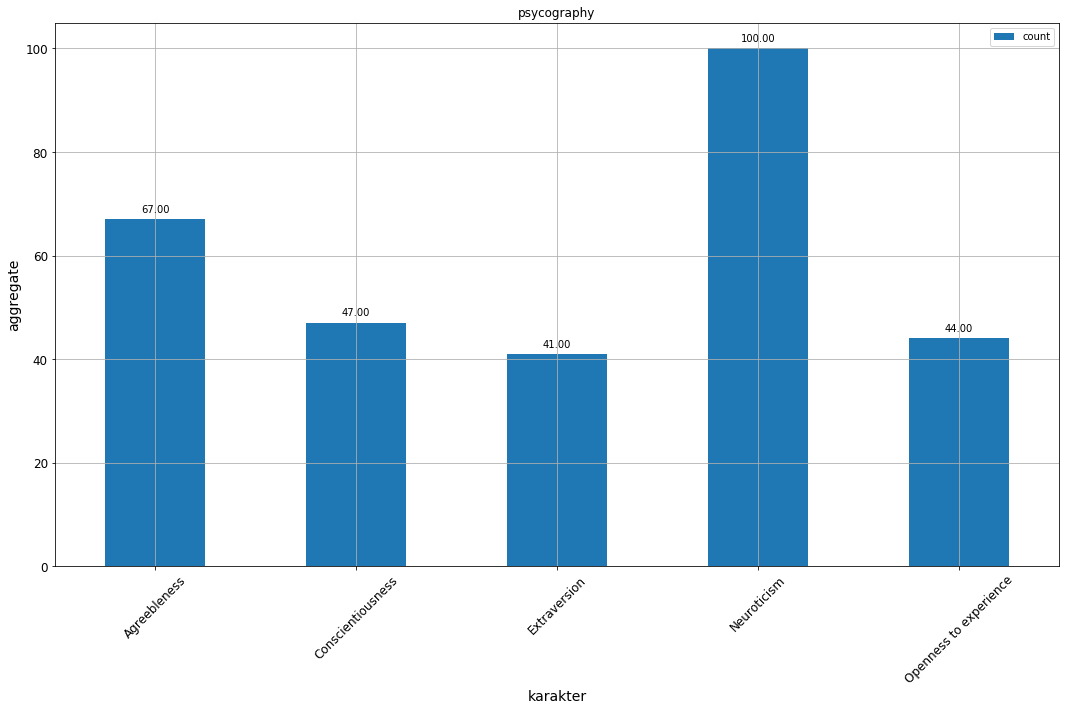

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sumdata[['count']].plot(kind='bar', title ="psycography", 
                                                    figsize=(18, 10), legend=True, fontsize=12, rot=45)
ax.set_xlabel("karakter", fontsize=14)
ax.set_ylabel("aggregate", fontsize=14)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.grid()
plt.show()

Try using Decision Tree n Random Forest

In [138]:
#using Decision tree
from sklearn import tree
text_clf_dtree = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf-dtree', tree.DecisionTreeClassifier(criterion = 'gini'))])

In [151]:
_3 = text_clf_dtree.fit(train['Text'], train['Kategori_id'])
predicted_dtree = text_clf_dtree.predict(tes['Text'])
np.mean(predicted_dtree == tes['Kategori_id'])

0.6387959866220736

In [140]:
#using Random Forest
from sklearn.ensemble import RandomForestClassifier
text_clf_rfc = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf-rfc', RandomForestClassifier())])

In [152]:
_4 = text_clf_rfc.fit(train['Text'], train['Kategori_id'])
predicted_rfc = text_clf_rfc.predict(tes['Text'])
np.mean(predicted_rfc == tes['Kategori_id'])

0.5852842809364549

Try using Unsupervised Learning K-means

In [142]:
#using Kmeans to look how it should be the class is..
from sklearn.cluster import KMeans
text_cls_kmean = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('cls-kmean', KMeans(n_clusters=3, random_state=1))])

In [143]:
_5 = text_cls_kmean.fit(train['Text'])
predicted_kmean = text_cls_kmean.predict(tes['Text'])
np.mean(predicted_kmean == tes['Kategori_id'])

0.0033444816053511705

In [144]:
predicted_kmean_l=list(predicted_kmean)

In [145]:
predicted_kmean_l

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [146]:
predicted_kmean_lid=[]
for i in predicted_kmean_l:
    if i == 0:
        print(i+1)
        predicted_kmean_lid.append(i+1)
#         predicted_kmean_lid.append(i=i+1)
    elif i == 1:
        print(i+1)
        predicted_kmean_lid.append(i+1)
#         predicted_kmean_lid.append(i=i+1)
    elif i == 2:
        print(i+1)
        predicted_kmean_lid.append(i+1)
#         predicted_kmean_lid.append(i=i+1)
            
    elif i == 3:
        print(i+1)
        predicted_kmean_lid.append(i+1)
#         predicted_kmean_lid.append(i=i+1)
    elif i == 4:
        print(i+1)
        predicted_kmean_lid.append(i+1)
#         predicted_kmean_lid.append(i=i+1)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [147]:
predicted_kmean_lid

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [148]:
np.mean(predicted_kmean_lid == tes['Kategori_id'])

0.20401337792642141